In [2]:
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as f
from tqdm import trange
from torch import optim

In [3]:
device = ('cuda' if torch.cuda.is_available() == True else 'cpu')

In [4]:
file_path = r"C:\Users\Asus\Documents\Aeronautical Engineering\Programming\my_ml_projects\datasets"

data = torchvision.datasets.MNIST(file_path, download=False, train=True, transform=transforms.ToTensor())
data_test = torchvision.datasets.MNIST(file_path, download=False, train=False, transform=transforms.ToTensor())

In [13]:
train_loader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

In [15]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.l2 = nn.Linear(128, 10)
        self.sm = nn.LogSoftmax(dim=1)
    def forward(self, x):
        x = f.relu(self.l1(x))
        x = self.l2(x)
        x = self.sm(x)
        return x

In [20]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    losses, accuracies = [], []
    for epoch in (t := trange(n_epochs)):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            labels = labels.long()
            imgs = imgs.view(-1, 28*28)
            out = model(imgs)
            cat = torch.argmax(out, dim=1)
            cat = cat.view(-1).float()
            acc = (cat == labels).float().mean()
            loss = loss_fn(out, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses.append(loss.to(device='cpu'))
        accuracies.append(acc.to(device='cpu'))
    l = list()
    for i in losses:
        l.append(i.detach().numpy())
    plt.plot(np.array(accuracies))
    plt.plot(np.array(l))
    plt.ylim(0, 1.1)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:46:26<00:00,  6.39s/it]


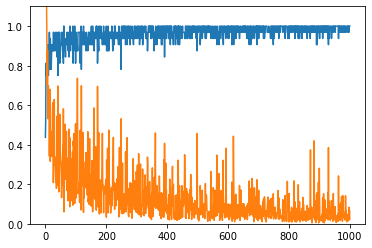

In [21]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr = 1e-3)
loss_fn = nn.NLLLoss()

training_loop(n_epochs=1000, optimizer=optimizer, model=model,
             loss_fn=loss_fn, train_loader=train_loader)

In [22]:
val_loader = torch.utils.data.DataLoader(data_test, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                imgs = imgs.view(-1, 28*28)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name, correct/total * 100))
        print(correct, total)
        
validate(model, train_loader, val_loader)

Accuracy train: 98.67
59200 60000
Accuracy val: 97.46
9746 10000
